#   Text-Hero

Texthero is a python toolkit to work with text-based dataset quickly and effortlessly. Texthero is very simple to learn and designed to be used on top of Pandas. Texthero has the same expressiveness and power of Pandas and is extensively documented. Texthero is modern and conceived for programmers of the 2020 decade with little knowledge if any in linguistic.

#   Texthero include tools for:

*   Preprocess text data: it offers both out-of-the-box solutions but it's also flexible for custom-solutions.
*   Natural Language Processing: keyphrases and keywords extraction, and named entity recognition.
*   Text representation: TF-IDF, term frequency, and custom word-embeddings (wip)
*   Vector space analysis: clustering (K-means, Meanshift, DBSCAN and Hierarchical), topic modeling (wip) and interpretation.
*   Text visualization: vector space visualization, place localization on maps (wip).

##   Installation

In [1]:
pip install texthero

  Using cached wasabi-0.9.1-py3-none-any.whl (26 kB)
  Using cached cymem-2.0.6-cp38-cp38-win_amd64.whl (36 kB)
  Using cached blis-0.7.7-cp38-cp38-win_amd64.whl (6.6 MB)
  Using cached preshed-3.0.6-cp38-cp38-win_amd64.whl (113 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23
Note: you may need to restart the kernel to use updated packages.


##   1. Text cleaning, TF-IDF representation and Visualization

### Load Dataset 

In [2]:
import texthero as hero
import pandas as pd

df = pd.read_csv(
   "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniket.itankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
df

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics
...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis
733,Mauresmo fights back to win title\n\nWorld num...,tennis
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis
735,GB players warned over security\n\nBritain's D...,tennis


####    Clean the text data, apply tfidf and then apply Principle Component Analysis 

In [4]:
df['pca'] = (
   df['text']
   .pipe(hero.clean)
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)



In [5]:
df

,text,topic,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09105733733066608, 0.10360599366234843]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0004371584247874354, 0.024738139271001356]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.1176391579253836, 0.1287019004109567]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09138142482470915, 0.15399980421261966]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09132047685437644, 0.1350702137675282]"
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[-0.06665893083618599, 0.10876574123204553]"
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[-0.0481179189792036, 0.05297771682325013]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[-0.04976470048072759, 0.060216712804802154]"
735,GB players warned over security\n\nBritain's D...,tennis,"[-0.04881470874824559, 0.013783728499715231]"


Plot the PCA on scatterplot

In [8]:
hero.scatterplot(df, 'pca', color='topic', title="PCA BBC Sport news")

##  2. Text preprocessing, TF-IDF, K-means and Visualization

In [9]:
df

,text,topic,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09105733733066608, 0.10360599366234843]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0004371584247874354, 0.024738139271001356]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.1176391579253836, 0.1287019004109567]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09138142482470915, 0.15399980421261966]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09132047685437644, 0.1350702137675282]"
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[-0.06665893083618599, 0.10876574123204553]"
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[-0.0481179189792036, 0.05297771682325013]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[-0.04976470048072759, 0.060216712804802154]"
735,GB players warned over security\n\nBritain's D...,tennis,"[-0.04881470874824559, 0.013783728499715231]"


In [11]:
df['tfidf'] = (
    df['text']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
)


In [12]:
df

,text,topic,pca,tfidf
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09105733733066608, 0.10360599366234843]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0004371584247874354, 0.024738139271001356]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.1176391579253836, 0.1287019004109567]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09138142482470915, 0.15399980421261966]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09132047685437644, 0.1350702137675282]","[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[-0.06665893083618599, 0.10876574123204553]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[-0.0481179189792036, 0.05297771682325013]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[-0.04976470048072759, 0.060216712804802154]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
735,GB players warned over security\n\nBritain's D...,tennis,"[-0.04881470874824559, 0.013783728499715231]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
df['kmeans_labels'] = (
    df['tfidf']
    .pipe(hero.kmeans, n_clusters=5)
    .astype(str)
)

c:\Users\aniket.itankar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

c:\Users\aniket.itankar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [14]:
df

,text,topic,pca,tfidf,kmeans_labels
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09105733733066608, 0.10360599366234843]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0004371584247874354, 0.024738139271001356]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.1176391579253836, 0.1287019004109567]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",4
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09138142482470915, 0.15399980421261966]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09132047685437644, 0.1350702137675282]","[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",4
...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[-0.06665893083618599, 0.10876574123204553]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[-0.0481179189792036, 0.05297771682325013]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[-0.04976470048072759, 0.060216712804802154]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
735,GB players warned over security\n\nBritain's D...,tennis,"[-0.04881470874824559, 0.013783728499715231]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [15]:
hero.scatterplot(df, 'pca', color='kmeans_labels', title="K-means BBC Sport news")

##  3. Simple pipeline for text cleaning

In [16]:
text = "This sèntencé    (123 /) needs to [OK!] be cleaned!   "

In [18]:
s = pd.Series(text)
s

0    This sèntencé    (123 /) needs to [OK!] be cle...
dtype: object

**Remove all digits from text**

In [19]:
s = hero.remove_digits(s)
s

0    This sèntencé    (  /) needs to [OK!] be clean...
dtype: object

**Remove all types of brackets and their content.**

In [20]:
s = hero.remove_brackets(s)
s

0    This sèntencé     needs to  be cleaned!   
dtype: object

**Remove diacritics.**

In [22]:
s = hero.remove_diacritics(s)
s

0    This sentence     needs to  be cleaned!   
dtype: object

**Remove extra white-spaces.**

In [23]:
s = hero.remove_whitespace(s)
s

0    This sentence needs to be cleaned!
dtype: object

**Remove Stop Words**

In [24]:
s = hero.remove_stopwords(s)
s

0    This sentence needs   cleaned!
dtype: object

**Remove Punctuations**

In [25]:
s = hero.remove_punctuation(s)
s

0    This sentence needs   cleaned 
dtype: object

**Tokenize the dataset**

In [26]:
hero.tokenize(s)

0    [This, sentence, needs, cleaned]
dtype: object

### NLP Named Entity Recoginition using Text Hero

In [30]:
text1 = "Hello this is Rahul from India working in MNC."

In [32]:
s1 = pd.Series(text1)
s1

0    Hello this is Rahul from India working in MNC.
dtype: object

In [33]:
hero.named_entities(s1,package='spacy')

0    [(Rahul, PERSON, 14, 19), (India, GPE, 25, 30)...
dtype: object

### NLP Noun CHunks (group of consecutive words that belong together.)

In [38]:
hero.noun_chunks(s1)[0]

[('Rahul', 'NP', 14, 19), ('India', 'NP', 25, 30), ('MNC', 'NP', 42, 45)]

##  Represtation
Map words into vectors using different algorithms such as TF-IDF, word2vec or GloVe.
*   dbscan  -   Perform DBSCAN clustering.
*   kmeans  -   Perform K-means clustering algorithm.
*   meanshift   -   Perform mean shift clustering.
*   nmf -   Perform non-negative matrix factorization.
*   pca -   	
Perform principal component analysis on the given Pandas Series.
*   term_frequency  -   Represent a text-based Pandas Series using term_frequency.
*   tfidf   -   	
Represent a text-based Pandas Series using TF-IDF.
*   tsne    -   	
Perform TSNE on the given pandas series.

In [40]:
s = pd.Series(["Sentence one", "Sentence two"])
s

0    Sentence one
1    Sentence two
dtype: object

In [42]:
hero.tfidf(s)

0    [0.5797386715376657, 0.8148024746671689, 0.0]
1    [0.5797386715376657, 0.0, 0.8148024746671689]
dtype: object

In [44]:
hero.term_frequency(s)

0    [1, 1, 0]
1    [1, 0, 1]
dtype: object

### Visualization

**Scatterplot**

In [47]:
hero.scatterplot(df,"pca",color="topic")

In [59]:
df

,text,topic,pca,tfidf,kmeans_labels
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[-0.09105733733066608, 0.10360599366234843]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[-0.0004371584247874354, 0.024738139271001356]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[-0.1176391579253836, 0.1287019004109567]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",4
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[-0.09138142482470915, 0.15399980421261966]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[-0.09132047685437644, 0.1350702137675282]","[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",4
...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[-0.06665893083618599, 0.10876574123204553]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[-0.0481179189792036, 0.05297771682325013]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[-0.04976470048072759, 0.060216712804802154]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
735,GB players warned over security\n\nBritain's D...,tennis,"[-0.04881470874824559, 0.013783728499715231]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


**Top Words**

In [60]:
top_20 = hero.visualization.top_words(df['text']).head(20)

In [61]:
top_20

the     12790
to       7051
a        5516
in       5271
and      5259
of       4255
for      2693
"        2416
I        2207
is       2200
on       2175
was      2129
with     1864
he       1861
have     1700
his      1666
that     1662
at       1653
The      1459
be       1422
Name: text, dtype: int64

<AxesSubplot:title={'center':'Top 20 words'}>

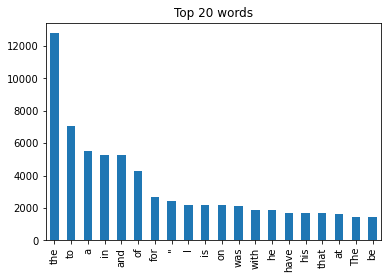

In [62]:
import matplotlib.pyplot as plt
top_20.plot.bar(rot=90,title = "Top 20 words")